Did I reasonably correctly run STAR/RSEM?

My plan was run STAR/RSEM locally, and then download the quantifications done by the DCC and see how well they match up.

In [8]:
import pandas
import numpy
from matplotlib import pyplot
import paramiko
import os

In [2]:
%matplotlib inline

In [12]:
def read_remote_csv(filename, **kwargs):
    host = paramiko.SSHClient()
    host.set_missing_host_key_policy(paramiko.WarningPolicy())
    host.connect('pongo.cacr.caltech.edu', username='diane')
    sftp = host.open_sftp()
    #sftp.chdir(submission_root)
    stream = sftp.open(filename)
    return pandas.read_csv(stream, **kwargs)

In [13]:
basedir='/woldlab/castor/home/diane/proj/test-star/15015-e11.5_heart1_10ngs/'
local_filename = os.path.join(basedir, 'Aligned.toTranscriptome.out_rsem.genes.results')
dcc_filename = os.path.join(basedir, 'ENCFF471VWH.tsv')

FPKM_COL = 6
local_15015_fpkms = read_remote_csv(local_filename, sep='\t', index_col=0, usecols=[0, FPKM_COL])
dcc_15015_fpkms = read_remote_csv(dcc_filename, sep='\t', index_col=0, usecols=[0, FPKM_COL])

/usr/lib/python3/dist-packages/paramiko/client.py:580: UserWarning: Unknown ssh-rsa host key for pongo.cacr.caltech.edu: b'6833531597d6176b45c27f33e9406a12'
  (key.get_name(), hostname, hexlify(key.get_fingerprint())))


In [15]:
set(local_15015_fpkms.index).difference(set(dcc_15015_fpkms.index))

set()

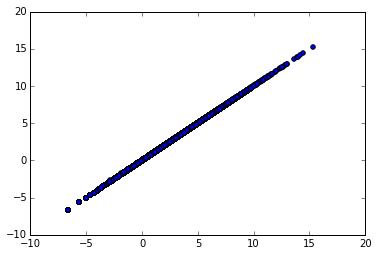

In [19]:
pyplot.scatter(numpy.log2(local_15015_fpkms), numpy.log2(dcc_15015_fpkms))

In [43]:
numpy.all(local_15015_fpkms['FPKM'] == dcc_15015_fpkms['FPKM'])

False

In [29]:
mismatch = []
for gene_id in local_15015_fpkms.index:
    if local_15015_fpkms['FPKM'][gene_id] != dcc_15015_fpkms['FPKM'][gene_id]:
        mismatch.append((gene_id, local_15015_fpkms['FPKM'][gene_id], dcc_15015_fpkms['FPKM'][gene_id]))

In [30]:
len(mismatch)

185

In [38]:
(412.85-412.84)/412.85

2.4221872350848364e-05

In [41]:

for gene_id, x, y in mismatch:
    d = numpy.abs(x-y)/x
    if d > 0.1:
        print(gene_id, x, y)
    

ENSMUSG00000020905.7 0.14 0.16
ENSMUSG00000090117.3 0.27 0.31
ENSMUSG00000100862.1 668.73 737.39


(array([ 181.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,    0.,    2.]),
 array([  1.00000000e-02,   6.87500000e+00,   1.37400000e+01,
          2.06050000e+01,   2.74700000e+01,   3.43350000e+01,
          4.12000000e+01,   4.80650000e+01,   5.49300000e+01,
          6.17950000e+01,   6.86600000e+01]),
 <a list of 10 Patch objects>)

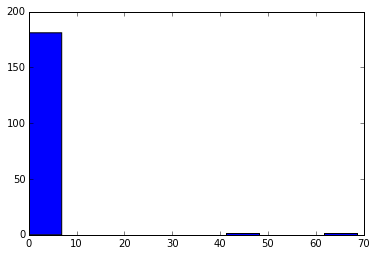

In [33]:
pyplot.hist(differences)

In [34]:
differences

[0.010000000000047748,
 0.0099999999999909051,
 0.0099999999999997868,
 0.0099999999999909051,
 0.15000000000000568,
 0.0099999999999909051,
 0.0099999999999909051,
 0.0099999999999980105,
 0.059999999999995168,
 0.0099999999999909051,
 0.19000000000000128,
 0.0099999999999909051,
 0.0099999999999909051,
 0.010000000000019327,
 0.0099999999999909051,
 0.0099999999999909051,
 0.0099999999999980105,
 0.0099999999999909051,
 0.010000000000218279,
 0.0099999999999909051,
 0.010000000000001563,
 0.0099999999999909051,
 0.020000000000000018,
 0.010000000000019327,
 0.0099999999999909051,
 0.43000000000006366,
 0.010000000000001563,
 0.010000000000005116,
 0.0099999999999980105,
 0.010000000000047748,
 0.010000000000104592,
 0.19000000000000128,
 0.0099999999999909051,
 0.010000000000218279,
 0.0099999999999980105,
 0.01999999999999999,
 0.010000000000005116,
 0.0099999999999909051,
 0.010000000000005116,
 0.0099999999999980105,
 0.010000000000005116,
 0.010000000000047748,
 0.009999999999990